In [ ]:
library(dplyr)
library(circlize)
library(DT)
library(dplyr)
library(tibble)
library(ComplexHeatmap)
library(RColorBrewer)

### load the data

In [2]:
phe_128 <- read.table('128sample.allphe.txt',header=T,sep="\t")

In [3]:
rownames(phe_128) <- phe_128$sample

In [4]:
snp_mutation <- read.table('snp_mutation_matrix.txt',header=T,sep="\t",row.names = 1,colClasses=c("character"))
colnames(snp_mutation) <- paste0("9D",(colnames(snp_mutation) %>% strsplit("_") %>% sapply(function(x) x[[1]])))

In [5]:
snp_mutation_113 <- snp_mutation[,intersect(phe_128$sample,colnames(snp_mutation))]

In [6]:
snp_mutation_all <- snp_mutation[,intersect(phe_128$sample,colnames(snp_mutation))]

In [7]:
cacner_gene <- read.table('/disk1/pengweixing/database/cancergene/merge.cancer.gene2',header=F)

In [8]:
phe_113 <- phe_128[intersect(phe_128$sample,colnames(snp_mutation)),]

In [9]:
dim(snp_mutation_113)

[1] 9891  113

### re-order mutation by its incidence

In [10]:
snp_mutation_all2 = snp_mutation_all
snp_mutation_all2[snp_mutation_all2>0] = 1
snp_mutation_all2[!snp_mutation_all2>0] = 0
snp_mutation_all2 <- mutate_all(snp_mutation_all2, function(x) as.numeric(x))
temp <- rowSums(snp_mutation_all2)
snp_mutation_all <- snp_mutation_all[order(temp,decreasing = TRUE),]

In [11]:
head(snp_mutation_all)

,9DW0014,9DW0002,9DW0003,9DW0008,9DW0068,9DW0071,9DW0073,9DW0074,9DW0075,9DW0079,⋯,9DW0250,9DW0251,9DW0261,9DW0262,9DW0270,9DW0271,9DW0372,9DW0373,9DW0374,9DW0377
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TP53,In_Frame_Del,Frame_Shift_Del,Missense_Mutation,Missense_Mutation,Missense_Mutation,Frame_Shift_Del,,Missense_Mutation,Missense_Mutation,Frame_Shift_Del,⋯,,Nonsense_Mutation,Nonsense_Mutation,Missense_Mutation,Splice_Site,,Missense_Mutation,Missense_Mutation,Missense_Mutation,Nonsense_Mutation
TTN,,Missense_Mutation,Missense_Mutation,Missense_Mutation,Missense_Mutation,multi_hits,,multi_hits,,multi_hits,⋯,,Missense_Mutation,Missense_Mutation,multi_hits,Missense_Mutation,,Missense_Mutation,Missense_Mutation,multi_hits,
MUC19,,Missense_Mutation,,,multi_hits,multi_hits,,Missense_Mutation,,Missense_Mutation,⋯,,Missense_Mutation,,,,,Splice_Site,,Missense_Mutation,
MUC16,,Missense_Mutation,,,multi_hits,Missense_Mutation,,Splice_Site,,,⋯,,,Missense_Mutation,Frame_Shift_Del,Missense_Mutation,Missense_Mutation,,,,
SYNE1,,Missense_Mutation,Missense_Mutation,,,Missense_Mutation,,,,,⋯,,,,Missense_Mutation,,,,,multi_hits,
CSMD3,,Nonsense_Mutation,Missense_Mutation,,,,,Missense_Mutation,,Missense_Mutation,⋯,,Missense_Mutation,,Missense_Mutation,,,,,,


In [12]:
rownames(phe_128) %>% setdiff(colnames(snp_mutation_all)) -> extra_names

In [13]:
phe_128[extra_names,] %>% filter(group=="negative") %>% select(smoke,sex)

,smoke,sex
,<chr>,<chr>
9DW0252,yes,male
9DW0400,no,male
9DW0403,yes,male
9DW0404,no,male
9DW0408,yes,male


In [354]:
phe_128[extra_names,] %>% .[,c('sample','group')] %>% arrange(group)

,sample,group
,<chr>,<chr>
9DW0001,9DW0001,High
9DW0188,9DW0188,High
9DW0277,9DW0277,High
9DW0349,9DW0349,High
9DW0366,9DW0366,High
9DW0393,9DW0393,High
9DW0089,9DW0089,Low
9DW0394,9DW0394,Low
9DW0396,9DW0396,Low


In [15]:
extra_mutation <- data.frame(matrix(data = "",nrow =nrow(snp_mutation_all),ncol = length(extra_names) ))

In [16]:
colnames(extra_mutation) <- extra_names
rownames(extra_mutation) <- rownames(snp_mutation_all)

In [18]:
snp_mutation_all <- cbind(snp_mutation_all,extra_mutation)

In [19]:
dim(snp_mutation_all)

[1] 9891  128

In [20]:
phe_128 <- phe_128[colnames(snp_mutation_all),]

### filter with cancer gene

In [11]:
snp_mutation113_cancer <- snp_mutation_113 %>% rownames() %>% intersect(cacner_gene$V1) %>% snp_mutation_113[.,]

In [22]:
snp_mutation_cancer <- snp_mutation_all %>% rownames() %>% intersect(cacner_gene$V1) %>% snp_mutation_all[.,]

In [23]:
head(snp_mutation_cancer)

,9DW0014,9DW0002,9DW0003,9DW0008,9DW0068,9DW0071,9DW0073,9DW0074,9DW0075,9DW0079,⋯,9DW0366,9DW0393,9DW0394,9DW0396,9DW0397,9DW0252,9DW0400,9DW0403,9DW0404,9DW0408
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TP53,In_Frame_Del,Frame_Shift_Del,Missense_Mutation,Missense_Mutation,Missense_Mutation,Frame_Shift_Del,,Missense_Mutation,Missense_Mutation,Frame_Shift_Del,⋯,,,,,,,,,,
MUC16,,Missense_Mutation,,,multi_hits,Missense_Mutation,,Splice_Site,,,⋯,,,,,,,,,,
CSMD3,,Nonsense_Mutation,Missense_Mutation,,,,,Missense_Mutation,,Missense_Mutation,⋯,,,,,,,,,,
FAT3,,,Missense_Mutation,,,,,,multi_hits,Missense_Mutation,⋯,,,,,,,,,,
LRP1B,,,,,multi_hits,Missense_Mutation,,multi_hits,multi_hits,multi_hits,⋯,,,,,,,,,,
FAT4,,,,,,multi_hits,,,,,⋯,,,,,,,,,,


In [24]:
column_title = "OncoPrint of SNP ProCod mutations in GCA "

alter_fun = list(
    background = alter_graphic("rect", fill = "#CCCCCC"),
    Splice_Site = alter_graphic("rect", fill = "#284A7E"),
    Missense_Mutation = alter_graphic("rect", fill = "#FF5F00"),
    multi_hits = alter_graphic("rect",  fill = "#FFA200"),
    Nonsense_Mutation = alter_graphic("rect", fill = "#006C51"),
    Translation_Start_Site = alter_graphic("rect", fill = "yellow"),
    Nonstop_Mutation = alter_graphic("rect", fill = "#c17ec4"),
    Frame_Shift_Del = alter_graphic("rect", fill = "#A67200"),
    In_Frame_Del = alter_graphic("rect", fill = "#A65100"),
    Frame_Shift_Ins = alter_graphic("rect", fill = "#A65F00"),
    In_Frame_Ins = alter_graphic("rect", fill = "#A62F00")
)
col = c("Splice_Site" = "#284A7E", "Missense_Mutation" = "#FF5F00", "Translation_Start_Site"="yellow",
        "multi_hits" = "#FFA200","Nonsense_Mutation"="#006C51",'Nonstop_Mutation'="#A62F00",
        "In_Frame_Del" = "#A65100","Frame_Shift_Del"="#A67200",
       "Frame_Shift_Ins" = "#A65F00","In_Frame_Ins" = "#A62F00" )

In [25]:
phe_128$Stage[phe_128$Stage == 'IA'] = "I"
phe_128$Stage[phe_128$Stage == 'IB'] = "I"
phe_128$Stage[phe_128$Stage == 'IIA'] = "II"
phe_128$Stage[phe_128$Stage == 'IIIA'] = "III"
phe_128$Stage[phe_128$Stage == 'IIIB'] = "III"
phe_128$Stage[phe_128$Stage == 'IVA'] = "IV"

In [26]:
phe_128$differentiation[phe_128$differentiation == 'middle'] = 'Mid_High'
phe_128$differentiation[phe_128$differentiation == 'high'] = 'Mid_High'
phe_128$differentiation[phe_128$differentiation == 'low'] = 'Low'

In [27]:
col_anno = list(Year = colorRamp2(c(0,4), c("white", "antiquewhite4")),
                Sex = c("male" = "#875003", "female" = "#ff9603"),
                Age = colorRamp2(c(20,82), c("white", "darkorchid4")),
                Area = c("higharea" = "#8f9101", "lowarea" = "#d1d602"),
                Fam_hist = c("positive" = "#027d0f","negative"  = "#00bf14"),
                Diff = c("NoRecord" = "white","Low" = "#3334FF","Mid_High" = "#33FFFF"),
                Stage = c("NoRecord" = "white",'I' = "#fcd4d4","II"  = "#fc9797","III" = "#ff5757","IV" = "#960202"),
                Metastasis = c("NoRecord" = "white","positive" = "#5e338a","negative" = "#9a52e3"),
                Smoke = c("yes" ="#e373f0" ,"no" = "#87428f"),
                Alcohol = c("yes" ="#b880ed" ,"no" = "#7006d1")
               )

In [13]:
high_cancer <- snp_mutation113_cancer[,phe_113[colnames(snp_mutation113_cancer),'group'] == 'High']
low_cancer <- snp_mutation113_cancer[,phe_113[colnames(snp_mutation113_cancer),'group'] == 'Low']
neg_cancer <- snp_mutation113_cancer[,phe_113[colnames(snp_mutation113_cancer),'group'] == 'negative']

high_cancer[high_cancer>0] = 1
high_cancer[!high_cancer>0] = 0
high_cancer <- mutate_all(high_cancer, function(x) as.numeric(x))

low_cancer[low_cancer>0] = 1
low_cancer[!low_cancer>0] = 0
low_cancer <- mutate_all(low_cancer, function(x) as.numeric(x))

neg_cancer[neg_cancer>0] = 1
neg_cancer[!neg_cancer>0] = 0
neg_cancer <- mutate_all(neg_cancer, function(x) as.numeric(x))

In [21]:
high_cancer['BRCA1',] %>% t() %>% as.data.frame() %>% filter(BRCA1>0)

,BRCA1
,<dbl>
9DW0169,1


In [23]:
high_cancer['BRCA2',] %>% t() %>% as.data.frame() %>% filter(BRCA2>0)

,BRCA2
,<dbl>
9DW0008,1
9DW0316,1


In [24]:
low_cancer['BRCA2',] %>% t() %>% as.data.frame() %>% filter(BRCA2>0)

,BRCA2
,<dbl>
9DW0074,1
9DW0196,1
9DW0388,1


In [14]:
data_cancer_heatmap <- data.frame(high = rowSums(high_cancer)/ncol(high_cancer),low = rowSums(low_cancer)/ncol(low_cancer),
           neg = rowSums(neg_cancer)/ncol(neg_cancer))

In [16]:
data_cancer_heatmap['BRCA1',]

,high,low,neg
,<dbl>,<dbl>,<dbl>
BRCA1,0.02380952,0,0


In [17]:
data_cancer_heatmap['BRCA2',]

,high,low,neg
,<dbl>,<dbl>,<dbl>
BRCA2,0.04761905,0.06666667,0


In [36]:
scale_rows <- function (x) 
{
    m = apply(x, 1, mean, na.rm = T)
    s = apply(x, 1, sd, na.rm = T)
    return((x - m)/s)
}
data_cancer_heatmap_scaled <- scale_rows(data_cancer_heatmap)

In [37]:
head(snp_mutation_cancer)

,9DW0014,9DW0002,9DW0003,9DW0008,9DW0068,9DW0071,9DW0073,9DW0074,9DW0075,9DW0079,⋯,9DW0366,9DW0393,9DW0394,9DW0396,9DW0397,9DW0252,9DW0400,9DW0403,9DW0404,9DW0408
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TP53,In_Frame_Del,Frame_Shift_Del,Missense_Mutation,Missense_Mutation,Missense_Mutation,Frame_Shift_Del,,Missense_Mutation,Missense_Mutation,Frame_Shift_Del,⋯,,,,,,,,,,
MUC16,,Missense_Mutation,,,multi_hits,Missense_Mutation,,Splice_Site,,,⋯,,,,,,,,,,
CSMD3,,Nonsense_Mutation,Missense_Mutation,,,,,Missense_Mutation,,Missense_Mutation,⋯,,,,,,,,,,
FAT3,,,Missense_Mutation,,,,,,multi_hits,Missense_Mutation,⋯,,,,,,,,,,
LRP1B,,,,,multi_hits,Missense_Mutation,,multi_hits,multi_hits,multi_hits,⋯,,,,,,,,,,
FAT4,,,,,,multi_hits,,,,,⋯,,,,,,,,,,


In [41]:
#pdf(file = "Mutation_all_threegroups.heatmap.pdf",height=10,width=12)
p_all_mutation_heatmap = oncoPrint(snp_mutation_cancer[1:20,], alter_fun = alter_fun,col=col, column_title = column_title,
            row_order = rownames(snp_mutation_cancer[1:20,]),
            right_annotation = NULL,
            show_row_names = FALSE,
         #   column_split = phe_128[colnames(snp_mutation_cancer),'group'],
            show_pct = TRUE,
            width = unit(25, "cm"),
            top_annotation = HeatmapAnnotation(
                            Age = phe_128$age,
                            Sex = phe_128$sex,  
                            Area  = phe_128$area,
                            Fam_hist = phe_128$family_history,
                            Stage = phe_128$Stage,
                            Metastasis = phe_128$Metastasis,
                            Diff = phe_128$differentiation ,   
                            Alcohol = phe_128$alcohol,
                            Smoke = phe_128$smoke,
                            col = col_anno
                            ), show_column_names = TRUE, column_names_gp = gpar(fontsize = 5),
             )+Heatmap(data_cancer_heatmap[1:20,],cluster_columns = FALSE,cluster_rows = FALSE, width = unit(1, "cm"))
#dev.off()

All mutation types: In_Frame_Del, Missense_Mutation, Frame_Shift_Del,
Nonsense_Mutation, Splice_Site, multi_hits, Frame_Shift_Ins,
Translation_Start_Site, In_Frame_Ins.

`alter_fun` is assumed vectorizable. If it does not generate correct
plot, please set `alter_fun_is_vectorized = FALSE` in `oncoPrint()`.

Warning message:
“The input is a data frame-like object, convert it to a matrix.”


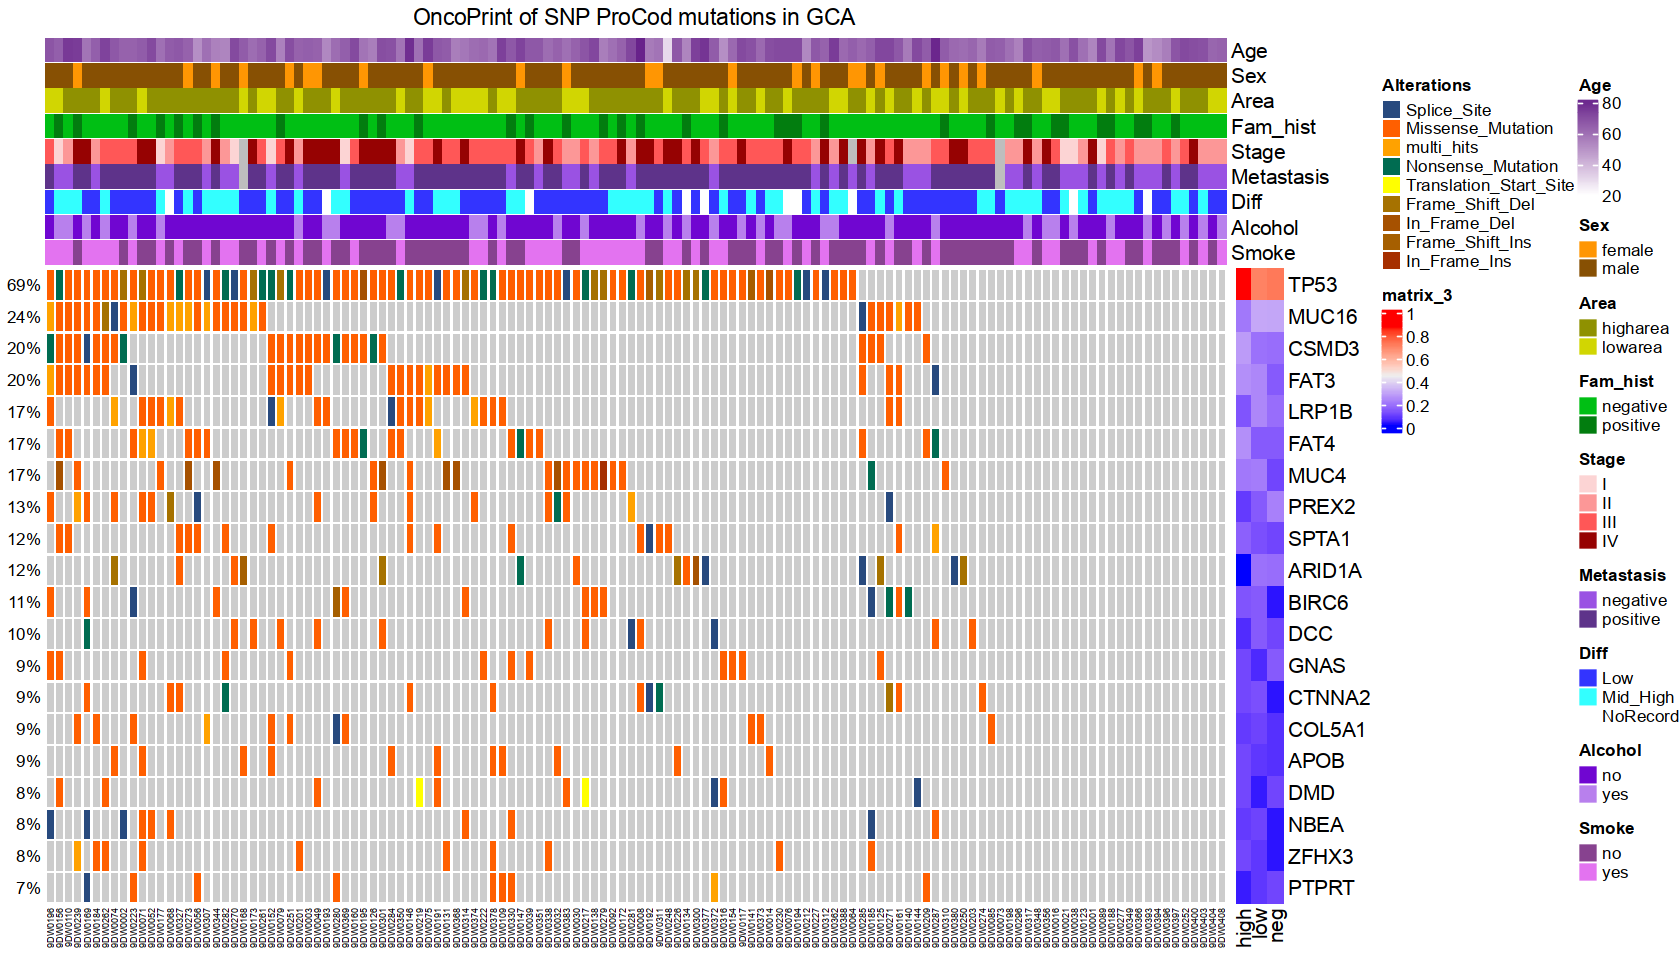

In [44]:
options(repr.plot.height=8,repr.plot.width=14)
p_all_mutation_heatmap

In [59]:
pdf(file = "Mutation128_cancer.heatmap.pdf",height=8,width=15)
p_all_mutation_heatmap
dev.off()

png 
  2

In [53]:
data128_heatmap <- data.frame(high = rowSums(high128)/ncol(high128),low = rowSums(low128)/ncol(low128),
           neg = rowSums(neg128)/ncol(neg128))
scale_rows <- function (x) 
{
    m = apply(x, 1, mean, na.rm = T)
    s = apply(x, 1, sd, na.rm = T)
    return((x - m)/s)
}
data128_heatmap_scaled <- scale_rows(data128_heatmap)

In [54]:
head(data128_heatmap)

,high,low,neg
,<dbl>,<dbl>,<dbl>
TP53,0.7708333,0.6530612,0.6129032
MUC16,0.1875000,0.2857143,0.2580645
CSMD3,0.2500000,0.1836735,0.1612903
FAT3,0.2291667,0.2244898,0.1290323
LRP1B,0.1250000,0.2244898,0.1612903
FAT4,0.2291667,0.1428571,0.1290323


In [335]:
phe_128 %>% arrange(group) %>% rownames() %>% snp_mutation_cancer[,.] -> snp_mutation_cancer_out

In [342]:
openxlsx::write.xlsx(x=snp_mutation_cancer_out,file = "Waterfull.heatmap2.xlsx",rowNames = TRUE)

In [57]:
#pdf(file = "Mutation_all_threegroups.heatmap.pdf",height=10,width=12)
p_all_mutation_heatmap = oncoPrint(snp_mutation_cancer[1:20,], alter_fun = alter_fun,col=col, column_title = column_title,
            row_order = rownames(snp_mutation_cancer[1:20,]),
            right_annotation = NULL,
            show_row_names = FALSE,
            column_split = phe_128[colnames(snp_mutation_cancer),'group'],
            show_pct = TRUE,
            width = unit(25, "cm"),
            top_annotation = HeatmapAnnotation(
                            Age = phe_128$age,
                            Sex = phe_128$sex,  
                            Area  = phe_128$area,
                            Fam_hist = phe_128$family_history,
                            Stage = phe_128$Stage,
                            Metastasis = phe_128$Metastasis,
                            Diff = phe_128$differentiation ,   
                            Alcohol = phe_128$alcohol,
                            Smoke = phe_128$smoke,
                            col = col_anno
                            ), show_column_names = TRUE, column_names_gp = gpar(fontsize = 5),
             )+Heatmap(data128_heatmap[1:20,],cluster_columns = FALSE,cluster_rows = FALSE, width = unit(1, "cm"))
#dev.off()

All mutation types: In_Frame_Del, Missense_Mutation, Frame_Shift_Del,
Nonsense_Mutation, Splice_Site, multi_hits, Frame_Shift_Ins,
Translation_Start_Site, In_Frame_Ins.

`alter_fun` is assumed vectorizable. If it does not generate correct
plot, please set `alter_fun_is_vectorized = FALSE` in `oncoPrint()`.

Warning message:
“The input is a data frame-like object, convert it to a matrix.”


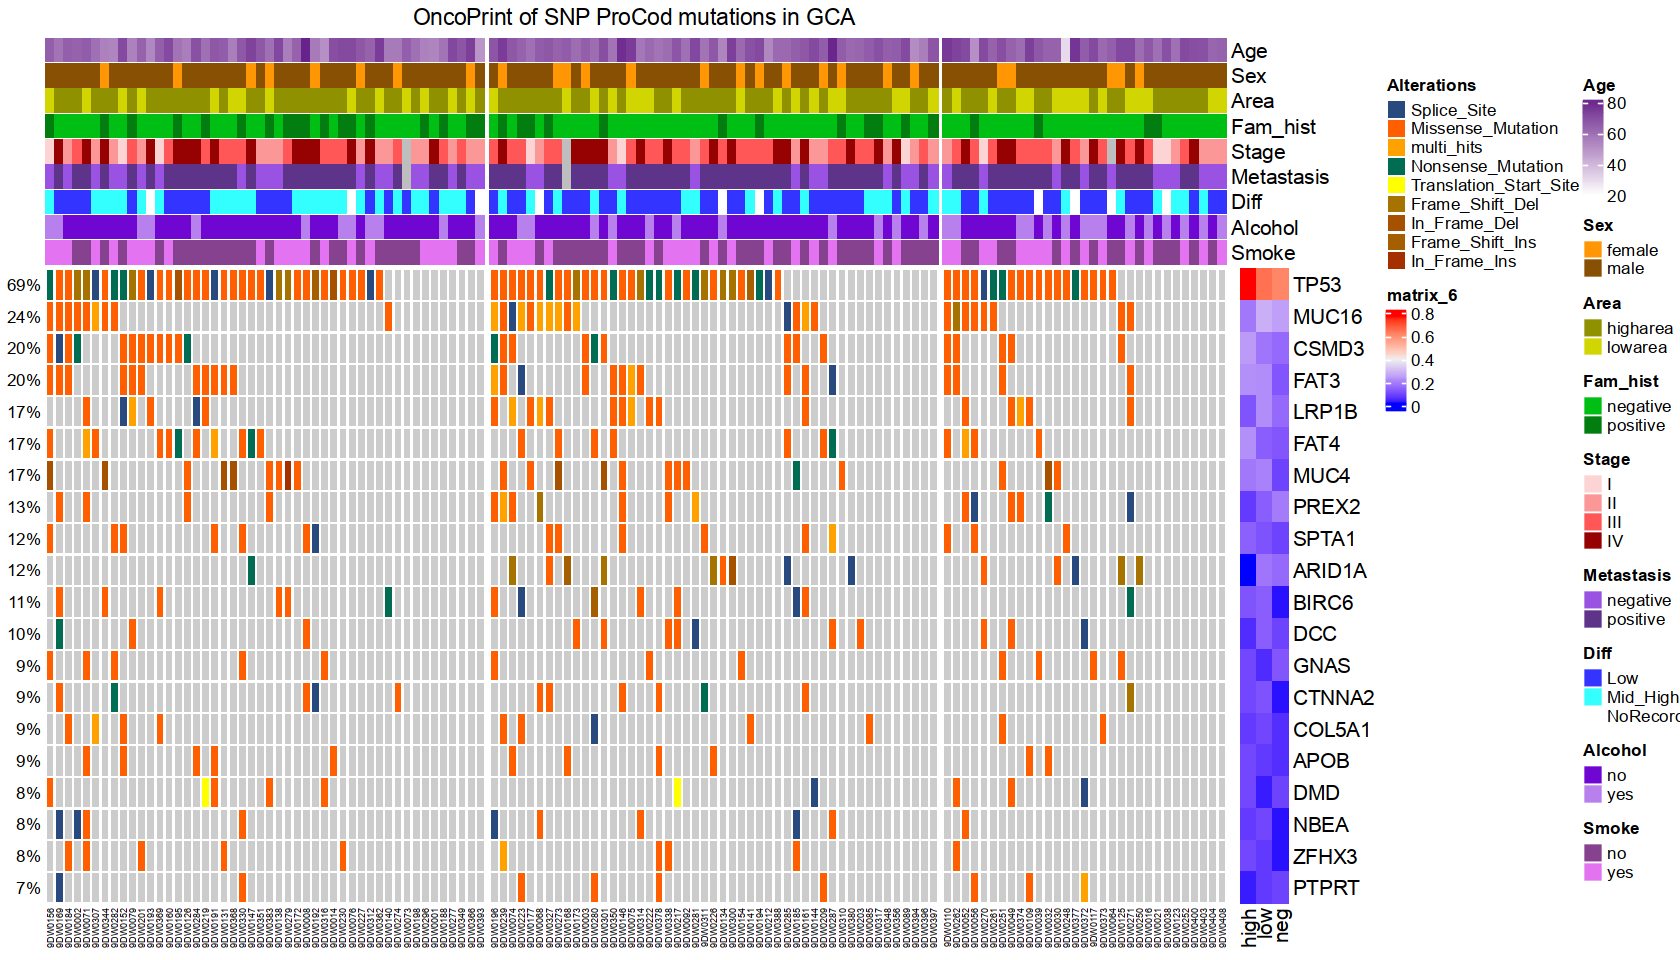

In [60]:
options(repr.plot.height=8,repr.plot.width=14)
p_all_mutation_heatmap

In [61]:
pdf(file = "Mutation128_allgene_threegroups.heatmap.pdf",height=6,width=16)
p_all_mutation_heatmap
dev.off()

png 
  2

### divide into different pathways

In [87]:
goterms <- AnnotationDbi::Ontology(GO.db::GOTERM)

In [88]:
library(org.Hs.eg.db)

In [89]:
go2gene <- suppressMessages(AnnotationDbi::mapIds(org.Hs.eg.db, keys=names(goterms), column= c("SYMBOL"),
                              keytype="GOALL", multiVals='list'))

In [90]:
goAnno <- stack(go2gene)

In [91]:
colnames(goAnno) <- c("SYMBOL", "GOALL")

In [92]:
goAnno <- unique(goAnno[!is.na(goAnno[,1]), ])

In [93]:
goAnno$ONTOLOGYALL <- goterms[goAnno$GOALL]

In [96]:
ont2 ='All'

In [97]:
GO2GENE <- unique(goAnno[, c(2,1)])

In [83]:
get_GO2TERM_table <- function() {
    GOTERM.df <- get_GOTERM()
    GOTERM.df[, c("go_id", "Term")] %>% unique
}

In [84]:
get_GOTERM <- function() {
    pos <- 1
    envir <- as.environment(pos)
    if (!exists(".GOTERM_Env", envir=envir)) {
        assign(".GOTERM_Env", new.env(), envir)
    }
    GOTERM_Env <- get(".GOTERM_Env", envir = envir)
    if (exists("GOTERM.df", envir = GOTERM_Env)) {
        GOTERM.df <- get("GOTERM.df", envir=GOTERM_Env)
    } else {
        GOTERM.df <- toTable(GOTERM)
        assign("GOTERM.df", GOTERM.df, envir = GOTERM_Env)
    }
    return(GOTERM.df)
}

In [104]:
GOTERM <- GO.db::GOTERM

In [105]:
go_term <- get_GO2TERM_table()

In [108]:
colnames(go_term) <- c('GOALL','Term')

In [109]:
All_GO_data <- right_join(x = goAnno,y =go_term, by = 'GOALL')

In [131]:
library(stringr)

In [121]:
top300 <- rownames(snp_mutation_all)[1:300]

In [171]:
top300 %>% intersect(All_GO_data$SYMBOL) -> genes

In [172]:
subset_df <- All_GO_data[All_GO_data$SYMBOL %in% genes, ]

In [190]:
subset_df$SYMBOL <- factor(subset_df$SYMBOL, levels = genes)

In [208]:
subset_df2 <- subset_df[order(subset_df$SYMBOL), ]

In [209]:
subset_df2 %>% filter(ONTOLOGYALL=="BP") -> subset_df2

In [198]:
openxlsx::write.xlsx(x=subset_df2,file = "top30extract.gene.go.xlsx",rowNames = TRUE)

In [210]:
subset_df3 <- subset_df2 %>% filter(str_detect(Term,'cell cycle|MAPK|Notch|PI3K|Ras|T cell differentiation|B cell differentiation|T cell proliferation|chemokine-mediated signaling pathway|histone modification T cell proliferation|B cell proliferation|mesenchymal cell proliferation'))

In [247]:
openxlsx::write.xlsx(x=subset_df3,file = "top30extract.gene.go2.xlsx",rowNames = TRUE)

In [294]:
pathway <- read.table('gene.pathway.txt')

In [295]:
colnames(pathway) <- c("name","pathway")

In [296]:
head(pathway)

,name,pathway
,<chr>,<chr>
1,TP53,cell_cycle
2,HMCN1,cell_cycle
3,ARID1A,cell_cycle
4,BIRC6,cell_cycle
5,ANKRD17,cell_cycle
6,PRKDC,cell_cycle


In [297]:
align_to <- list()

In [298]:
for(each in unique(pathway$pathway)){
    align_to[[each]]  = grep(each,pathway$pathway)
}

In [299]:
panel_fun = function(index, nm) {
    grid.rect(gp = gpar(fill = index, col = NA), just = "right")
    grid.text(unique(pathway[index,]$pathway), -1, 0.5,just = "right")
}

In [300]:
snp_mutation_select <- snp_mutation_all[pathway$name,]

In [301]:
dim(snp_mutation_select)

[1]  24 128

In [302]:
high_select <- snp_mutation_select[,phe_128[colnames(snp_mutation_select),'group'] == 'High']
low_select <- snp_mutation_select[,phe_128[colnames(snp_mutation_select),'group'] == 'Low']
neg_select <- snp_mutation_select[,phe_128[colnames(snp_mutation_select),'group'] == 'negative']

high_select[high_select>0] = 1
high_select[!high_select>0] = 0
high_select <- mutate_all(high_select, function(x) as.numeric(x))

low_select[low_select>0] = 1
low_select[!low_select>0] = 0
low_select <- mutate_all(low_select, function(x) as.numeric(x))

neg_select[neg_select>0] = 1
neg_select[!neg_select>0] = 0
neg_select <- mutate_all(neg_select, function(x) as.numeric(x))

In [303]:
data_select_heatmap <- data.frame(high = rowSums(high_select)/ncol(high_select),low = rowSums(low_select)/ncol(low_select),
           neg = rowSums(neg_select)/ncol(neg_select))

In [314]:
options(repr.plot.height=8,repr.plot.width=16)
pdf(file = "Heatmap_mutation_pathway.pdf",height=8,width=16)
oncoPrint(snp_mutation_select, alter_fun = alter_fun,col=col, column_title = column_title,
            row_order = rownames(snp_mutation_select),
            right_annotation = NULL,
               show_row_names = FALSE,
            column_split = phe_128[colnames(snp_mutation_select),'group'],
            show_pct = FALSE,
            width = unit(20, "cm"),
            top_annotation = HeatmapAnnotation(
                            Age = phe_128$age,
                            Sex = phe_128$sex,  
                            Area  = phe_128$area,
                            Fam_hist = phe_128$family_history,
                            Stage = phe_128$Stage,
                            Metastasis = phe_128$Metastasis,
                            Diff = phe_128$differentiation ,   
                            Alcohol = phe_128$alcohol,
                            Smoke = phe_128$smoke,
                            col = col_anno
                            ),
            left_annotation = rowAnnotation(foo = anno_block(
            align_to = align_to,
            panel_fun = panel_fun,
            width = unit(2, "mm"),
               )
             )
            )+Heatmap(data_select_heatmap,cluster_columns = FALSE,cluster_rows = FALSE, width = unit(1, "cm"))
dev.off()

All mutation types: In_Frame_Del, Missense_Mutation, Frame_Shift_Del,
Splice_Site, multi_hits, Nonsense_Mutation, Frame_Shift_Ins,
In_Frame_Ins, Translation_Start_Site.

`alter_fun` is assumed vectorizable. If it does not generate correct
plot, please set `alter_fun_is_vectorized = FALSE` in `oncoPrint()`.

Warning message:
“The input is a data frame-like object, convert it to a matrix.”


png 
  2

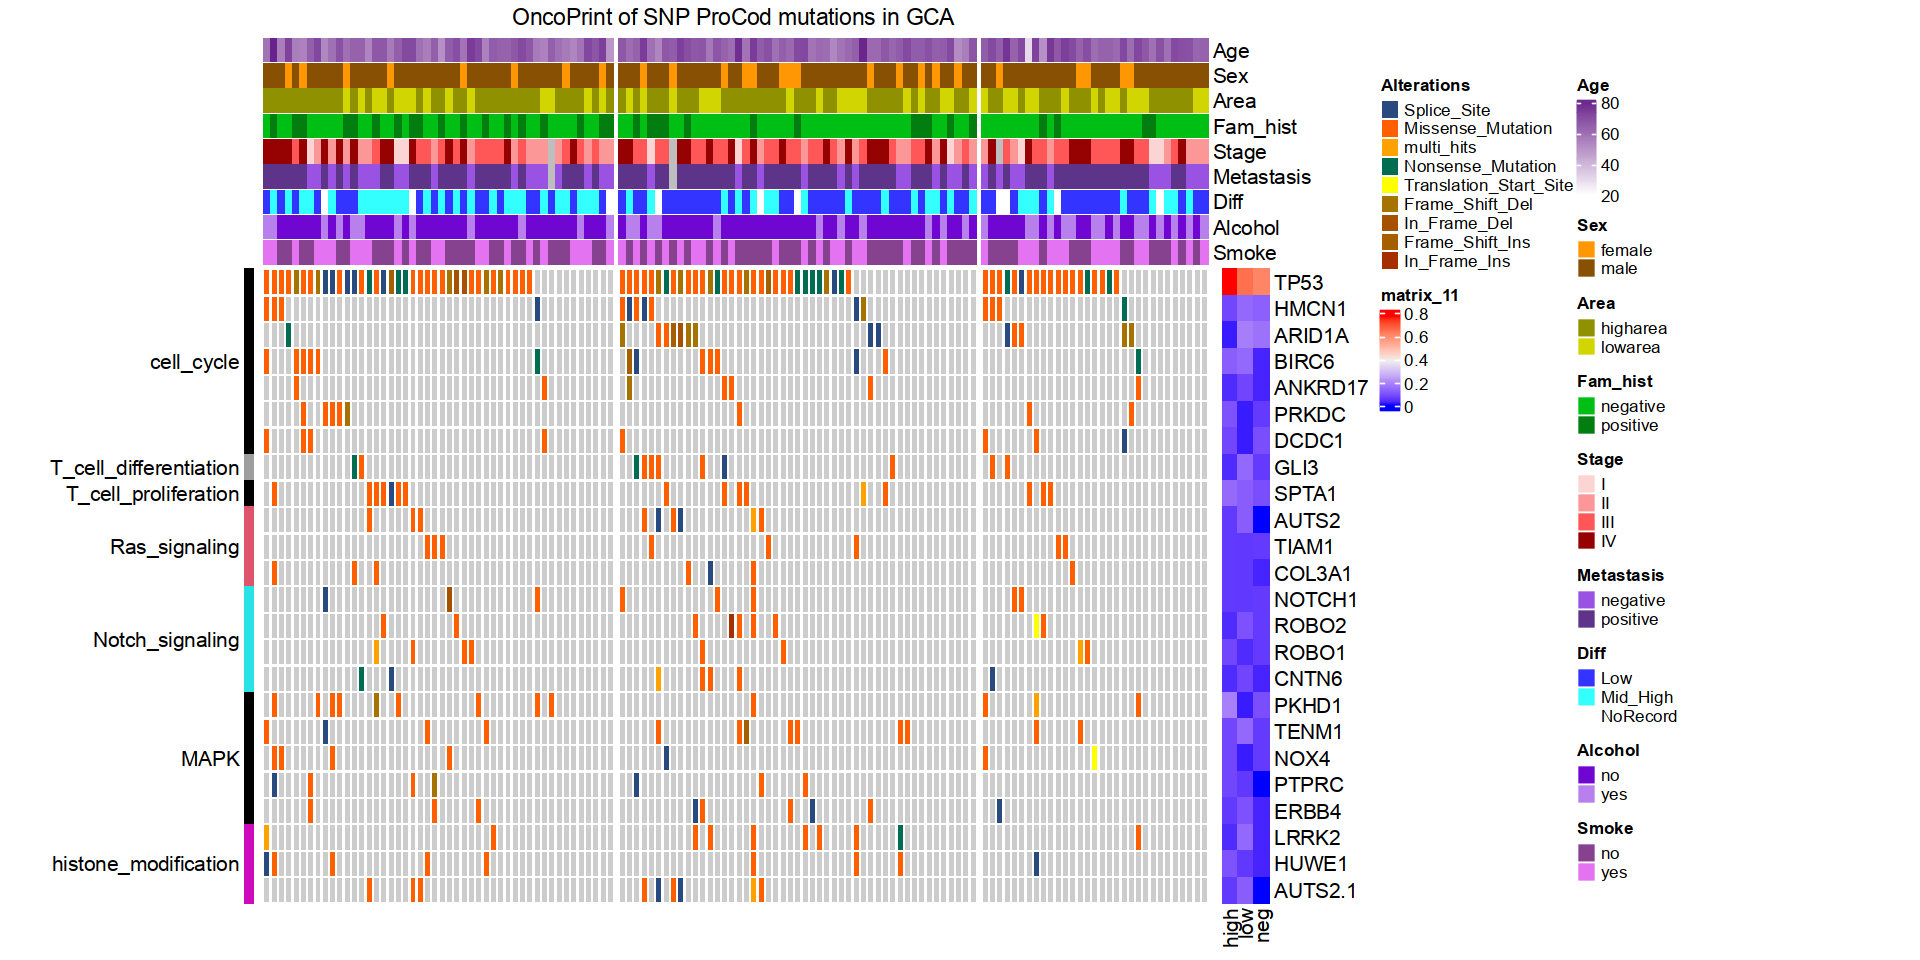

In [315]:
p2

In [308]:
library(ggplot2)

### significant calculation

In [356]:
binary_transform <- function(data) {
  data[data > 0] <- 1
  data[!data > 0] <- 0
  return(mutate_all(data, function(x) as.numeric(x)))
}

In [366]:
snp_113_binary <- binary_transform(snp_mutation113_cancer)
high113 <- binary_transform(snp_mutation113_cancer[, phe_128[colnames(snp_mutation113_cancer), 'group'] == 'High'])
low113 <- binary_transform(snp_mutation113_cancer[, phe_128[colnames(snp_mutation113_cancer), 'group'] == 'Low'])
neg113 <- binary_transform(snp_mutation113_cancer[, phe_128[colnames(snp_mutation113_cancer), 'group'] == 'negative'])

In [380]:
data_113_heatmap <- data.frame(High_samples =rowSums(high113),Low_samples = rowSums(low113),
                               Neg_samples = rowSums(neg113),
                               High_freq = rowSums(high113)/ncol(high113),
                               Low_freq = rowSums(low113)/ncol(low113),
                               Neg_freq = rowSums(neg113)/ncol(neg113))

In [383]:
snp_113_binary_heatmap <- data.frame(All_samples =rowSums(snp_113_binary) ,All_freq = rowSums(snp_113_binary)/ncol(snp_113_binary))

In [386]:
phe_113 %>% count(group)

group,n
<chr>,<int>
High,42
Low,45
negative,26


In [387]:
cbind(snp_113_binary_heatmap,data_113_heatmap) -> snp_113_stat_table

In [388]:
head(snp_113_stat_table)

,All_samples,All_freq,High_samples,Low_samples,Neg_samples,High_freq,Low_freq,Neg_freq
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TP53,88,0.7787611,37,32,19,0.8809524,0.7111111,0.7307692
MUC16,31,0.2743363,9,14,8,0.2142857,0.3111111,0.3076923
CSMD3,26,0.2300885,12,9,5,0.2857143,0.2000000,0.1923077
FAT3,26,0.2300885,11,11,4,0.2619048,0.2444444,0.1538462
LRP1B,22,0.1946903,6,11,5,0.1428571,0.2444444,0.1923077
FAT4,22,0.1946903,11,7,4,0.2619048,0.1555556,0.1538462


In [390]:
samp_number <- matrix(data = c(42,45,26),nrow = 3)

In [393]:
rlt <- as.data.frame(matrix(data=NA,nrow = nrow(snp_113_stat_table)))
colnames(rlt) <- "Pvalue"
for(i in 1:nrow(snp_113_stat_table)){
    cbind(snp_113_stat_table[i,3:5] %>% t(),samp_number - snp_113_stat_table[i,3:5] %>% t()  ) -> a
    fisher.test(a) ->b
    b$p.value -> rlt[i,1]
}

In [399]:
snp_113_stat_table2 <- cbind(snp_113_stat_table,rlt)

In [400]:
openxlsx::write.xlsx(x=snp_113_stat_table2,file = "Mutation115.statistics.xlsx",rowNames = TRUE)

In [404]:
pdf(file = "Heatmap_mutation113.pdf",height=8,width=16)
Heatmap(snp_113_stat_table2[1:20,6:8],cluster_columns = FALSE,cluster_rows = FALSE, width = unit(1, "cm"))
dev.off()

Warning message:
“The input is a data frame-like object, convert it to a matrix.”


png 
  2

In [405]:
highpath <- binary_transform(snp_mutation_select[, phe_128[colnames(snp_mutation_select), 'group'] == 'High'])
lowpath <- binary_transform(snp_mutation_select[, phe_128[colnames(snp_mutation_select), 'group'] == 'Low'])
negpath <- binary_transform(snp_mutation_select[, phe_128[colnames(snp_mutation_select), 'group'] == 'negative'])

In [407]:
data_113pathway_heatmap <- data.frame(High_samples =rowSums(highpath),Low_samples = rowSums(lowpath),
                               Neg_samples = rowSums(negpath),
                               High_freq = rowSums(highpath)/ncol(highpath),
                               Low_freq = rowSums(lowpath)/ncol(lowpath),
                               Neg_freq = rowSums(negpath)/ncol(negpath))

In [414]:
pdf(file = "Heatmap_pathway.mutation113.pdf",height=8,width=16)
Heatmap(data_113pathway_heatmap[1:24,4:6],cluster_columns = FALSE,cluster_rows = FALSE, width = unit(1, "cm"))
dev.off()

Warning message:
“The input is a data frame-like object, convert it to a matrix.”


png 
  2